In [26]:
# !pip install seaborn
!pip install graphviz==0.20.1
!apt-get install graphviz

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [1]:
import numpy as np
import seaborn as sb
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# features

# long hair
# small leg
# bark bark

pig1 = [0,1,0]
pig2 = [0,1,1]
pig3 = [1,1,0]

dog1 = [0,1,1]
dog2 = [1,0,1]
dog3 = [1,1,1]

training_x = [pig1,pig2,pig3,dog1,dog2,dog3]

# classification / dog == 0, pig == 1
training_y = [1,1,1,0,0,0]

In [3]:
model = LinearSVC()
model.fit(training_x,training_y)

/opt/mamba_files/mamba/envs/sirius/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [4]:
# this cell selects the mystery animals to train the algorithm

mystery1 = [1,1,1]
mystery2 = [1,1,0]
mystery3 = [0,1,1]

test_x = [mystery1,mystery2,mystery3]
test_y = np.array([0,1,1])

predicting_variables = model.predict(test_x)

In [5]:
cond = test_y == predicting_variables

'the percentile is {:.2f} %'.format(cond.sum()/predicting_variables.size*100)

# this function from sklearn library gets the accuracy rate from our model 
'the accuracy rate from our model is {:.2f} %'.format(accuracy_score(test_y, predicting_variables)*100)

'the accuracy rate from our model is 66.67 %'

In [2]:
# second project

import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"

table_of_tests = pd.read_csv(url)

In [3]:
table_of_tests.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [140]:
x = table_of_tests[['home', 'how_it_works', 'contact']]
y = table_of_tests[['bought']]

In [6]:
row_number = table_of_tests.shape[0]

np.intp(row_number * 0.75)

74

In [29]:
import matplotlib.pyplot as plt

# this way of select the random elements from the training variables is valid if u dont know functions to make the work easier


def gen_random_array(n, percent):
    l = []
    while len(l) < percent*100:
        rand_number = np.random.randint(n)
        if rand_number not in l:
            l.append(rand_number)
    
    return np.array(l)

# the function below do the same work of the gen_random_array does and probably is more efective and optimized
random_array = np.random.randint(0,101, 75)
# for this reason I will use the numpy function regrecting the fact I did anoter version of the same function

In [641]:
# every time the user calls this function it selects random values for x test

def get_the_tests(n_size, percent, x, y):

    model = LinearSVC()

    q = int(percent*n_size)
    array = np.intp(np.linspace(0,n_size-1, n_size))
    random_array = np.random.choice(array, q, replace=False)

    rest_array = []
    for iten in array:
        if iten not in random_array:
            rest_array.append(iten)
    
    rest_array = np.array(rest_array)
    vec_tup_x = np.array(tuple(x.itertuples()))
    vec_tup_y = np.array(tuple(y.itertuples()))

    test_sample_x = vec_tup_x[rest_array]
    test_sample_y = vec_tup_y[rest_array]
    training_sample_x = vec_tup_x[random_array]
    training_sample_y = vec_tup_y[random_array]

    model.fit(training_sample_x[:,1:],training_sample_y[:,1:])
    predicting_variables = model.predict(test_sample_x[:,1:])

    ac_score = accuracy_score(test_sample_y[:,1:].flatten(), predicting_variables)

    return ac_score

# I discovered that, I choose a wrong way to get the accuracy, because
# it is necessary that this variable remains constant and if the algorithm
# is completely radomized the analisys goes wrong. So exists a function from sklearn
# that controls this randomizing rate and stractfy the proportion based on y vector.

/opt/mamba_files/mamba/envs/sirius/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/mamba_files/mamba/envs/sirius/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.92

In [1]:
# this refers to the third project related with machine learning in alura's course
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# if I dont like of the names of columns I can change it with a map7
# and if there is a column (y) that doesnt make much sense like unfinished
# I can switch the values of 1 by 0 and the values of 0 by 1 with another map

map = {
    'unfinished':'nao_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'preco'
}

switch = {
    1:0,
    0:1
}

data = data.rename(columns=map)

data['finalizado'] = data.nao_finalizado.map(switch)
data.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


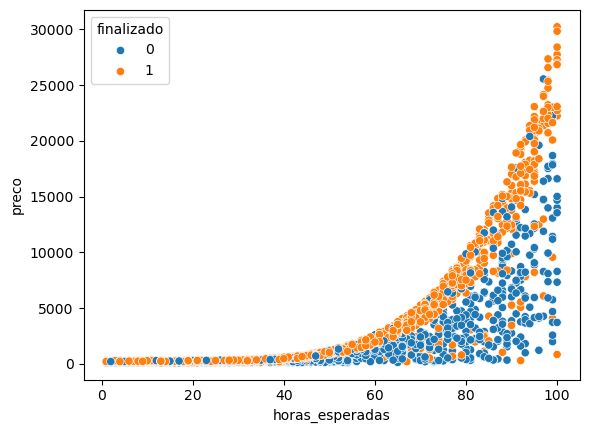

In [3]:
# the seaborn library is very usefull to analyse a dataset when it is given by a pandas object
# with this library u can make colors distinct by the hue parameter
# this is realy very usefull when working with pandas is necessary

sb.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=data)
plt.show()


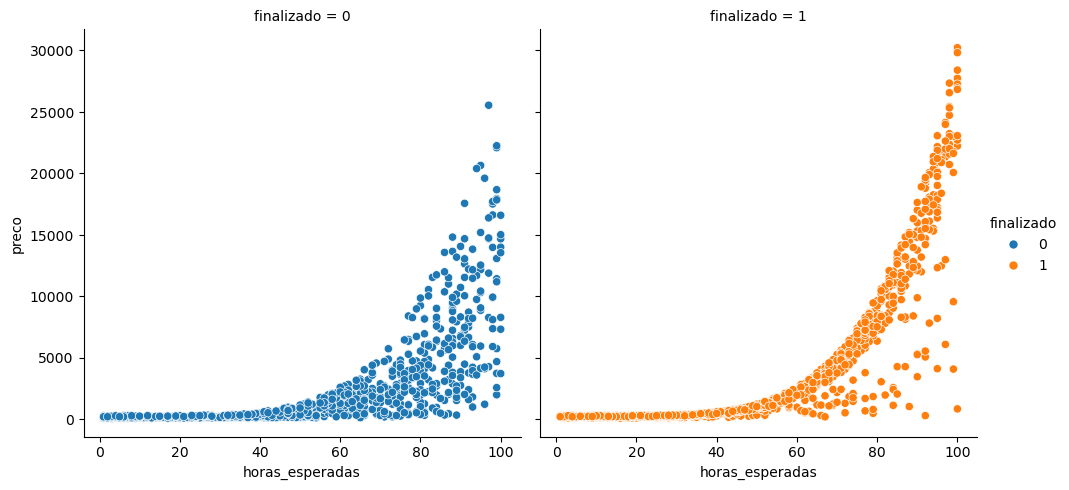

In [4]:
# it is also possible plot two graphics distincting by some caracteristic (y)

sb.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=data)
plt.show()

# it is clear the distinction between the two caracteristics of the the two plots below

In [5]:
x = data[['preco','horas_esperadas']]
y = data['finalizado']

In [6]:
# to divide the tests and the train is usefull to use the train_test_split function from sklearn

# this step is necessary to make things a litle bit less randomly distributed
# remind that this is valid beacuase sklearn algorithms is based in numpy random functions


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

seed = 5
np.random.seed(seed)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,random_state=seed, test_size=0.25, stratify=y)


scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

# model = LinearSVC()
model = SVC()
model.fit(x_train, y_train)
predicting_variables = model.predict(x_test)

In [7]:
length_test = x_test.shape[0]
length_train = x_train.shape[0]

ac_score = accuracy_score(y_test, predicting_variables)
print(f'we have training with {length_train} elements and the length of ours test is {length_test}, our accuracy was {ac_score*100} %')

my_assumption = np.ones(length_test)
my_accuracy = accuracy_score(y_test, my_assumption)
print(f'my accuracy only assumpting that all jobs was finished was {my_accuracy*100}')

we have training with 1617 elements and the length of ours test is 540, our accuracy was 66.85185185185185 %
my accuracy only assumpting that all jobs was finished was 52.59259259259259


In [8]:
# we must analyse the test so that we can comparate with all data we have 
# and verify if they behave like the training variables we choose

# sb.relplot(x='horas_esperadas', y='preco', data=x_test, hue=y_test, col=y_test)
# plt.show()

# it seems that the test we choose for analyses behave like the training variables selected previously

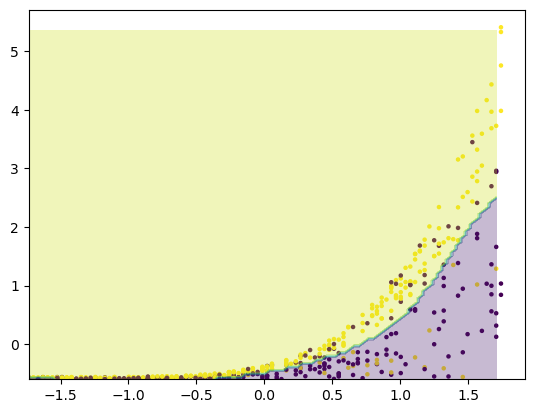

In [12]:
preco_max = x_test[:,0].max()
preco_min = x_test[:,0].min()
horas_max = x_test[:,1].max()
horas_min = x_test[:,1].min()

pixels = 100

# this step is necessary to work with matrices because we desire to work with a meshgrid numpy object

eixo_y = np.arange(preco_min , preco_max, (preco_max - preco_min)/pixels)
eixo_x = np.arange(horas_min, horas_max, (horas_max - horas_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

points = np.c_[yy.ravel(), xx.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

plt.scatter(x_test[:,1], x_test[:,0], c=y_test, s=5)
plt.contourf(xx,yy,Z, alpha=0.3)
plt.show()

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

uri_p = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri_p)
dados.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
# fator de conversão de milha para km é mais comum as medidas serem feitas em km

# 1 mile = fact * 1 km
fact = 1.61
dados['mileage_per_year'] = dados.mileage_per_year * fact

swicht = {
    'Unnamed: 0':'indice',
    'mileage_per_year':'km_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}

dados = dados.rename(columns=swicht)

map_p = {
    'yes':1,
    'no':0
}

if 'yes' in list(dados.vendido):
    dados['vendido'] = dados.vendido.map(map_p)
    dados = dados.set_index('indice')
else:
    pass

ano = datetime.today().year
dados['idade_do_carro'] = ano - dados.ano_do_modelo
dados.head()



,km_por_ano,ano_do_modelo,preco,vendido,idade_do_carro
indice,,,,,
0,35099.61,2000,30941.02,1,24
1,12627.23,1998,40557.96,1,26
2,11445.49,2006,89627.50,0,18
3,43185.03,2015,95276.14,0,9
4,12775.35,2014,117384.68,1,10


In [3]:
dados = dados.drop(['ano_do_modelo'], axis=1)
dados.head()

,km_por_ano,preco,vendido,idade_do_carro
indice,,,,
0,35099.61,30941.02,1,24
1,12627.23,40557.96,1,26
2,11445.49,89627.50,0,18
3,43185.03,95276.14,0,9
4,12775.35,117384.68,1,10


In [4]:
x = dados[['preco','idade_do_carro','km_por_ano']]
y = dados['vendido']

In [17]:
# to divide the tests and the train is usefull to use the train_test_split function from sklearn

# this step is necessary to make things a litle bit less randomly distributed
# remind that this is valid beacuase sklearn algorithms is based in numpy random functions


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

seed = 5
np.random.seed(seed)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,random_state=seed, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

# model = LinearSVC()
model = SVC()
model.fit(x_train, y_train)
predicting_variables = model.predict(x_test)

ac_score = accuracy_score(y_test, predicting_variables)

dummy = DummyClassifier(strategy='stratified')
dummy.fit(raw_x_train, y_train)
baseline_score = dummy.score(raw_x_test,y_test)

f'treinamos com {len(raw_x_train)} elementos e testamos em {len(raw_x_test)} elementos', ac_score*100, baseline_score*100 

('treinamos com 7500 elementos e testamos em 2500 elementos', 77.48, 51.6)

In [37]:
# to divide the tests and the train is usefull to use the train_test_split function from sklearn

# this step is necessary to make things a litle bit less randomly distributed
# remind that this is valid beacuase sklearn algorithms is based in numpy random functions


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 5
np.random.seed(seed)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,random_state=seed, test_size=0.25, stratify=y)

# model = LinearSVC()
model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_x_train, y_train)
predicting_variables = model.predict(raw_x_test)

ac_score = accuracy_score(y_test, predicting_variables)

dummy = DummyClassifier(strategy='stratified')
dummy.fit(raw_x_train, y_train)
baseline_score = dummy.score(raw_x_test,y_test)

f'treinamos com {len(raw_x_train)} elementos e testamos em {len(raw_x_test)} elementos', ac_score*100, baseline_score*100 

('treinamos com 7500 elementos e testamos em 2500 elementos', 79.28, 51.6)

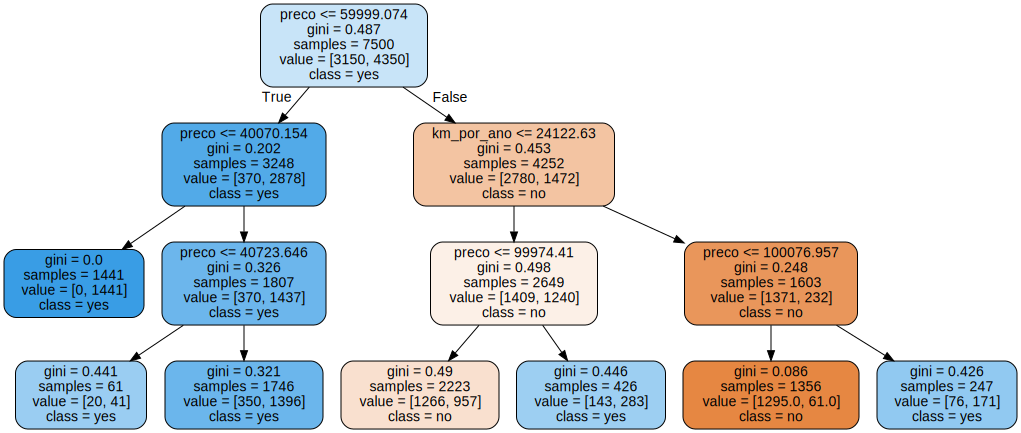

In [38]:
from sklearn.tree import export_graphviz
import graphviz

features_names = x.columns

dot_data = export_graphviz(model, out_file=None,
                           feature_names=features_names,
                           filled=True, rounded=True,
                           class_names=['no','yes'],)

graph = graphviz.Source(dot_data)
graph